<a href="https://colab.research.google.com/github/Hargen1/DRL_2022/blob/main/drl_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **安裝相關套件**

In [ ]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!pip install stable_baselines3 gym box2d-py tensorflow-gpu #使用gym box2d

# Imports and Helper functions


In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""
game = "Acrobot-v1" #遊戲種類
def show_video(): #顯示訓練結果
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read() #以影片形式撥放
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make(game))

In [ ]:
print(env.action_space) #action space

### **測試環境**

In [ ]:
observation = env.reset()
reward = 0
while True:
  
    env.render()
        
    action = env.action_space.sample() #隨機sample做測試
         
    observation, rewards, done, info = env.step(action) 
    reward += rewards
        
    if done: 
      break;

print(reward)  
env.close()
show_video()

# **訓練**

In [ ]:
env = wrap_env(gym.make(game))
env = DummyVecEnv([lambda: env])
model = DQN('MlpPolicy', game, verbose=1) # 使用DQN module

In [ ]:
model.learn(total_timesteps=1000000) #訓練step數目

In [ ]:
#evaluate_policy(model, env, n_eval_episodes=10, render=True)
#env.close()
env.close()

# **儲存模型**

In [ ]:
model.save("/content/drive/MyDrive/deep reinforcement learning/colab/DQN_model") #雲端硬碟路徑

In [ ]:
del model

# **測試**

In [ ]:
model = DQN.load("/content/drive/MyDrive/deep reinforcement learning/colab/DQN_model", env=env) #雲端硬碟路徑

In [ ]:
#env.close()
env = wrap_env(gym.make(game))
obs = env.reset() #reset
done = False
reward = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    reward+=rewards
    env.render()
    
print("reward = ",reward)

env.close()


In [ ]:
show_video()

#**訓練結果**

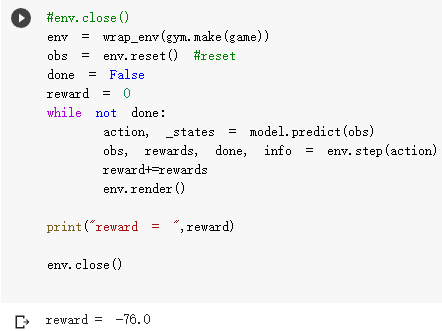

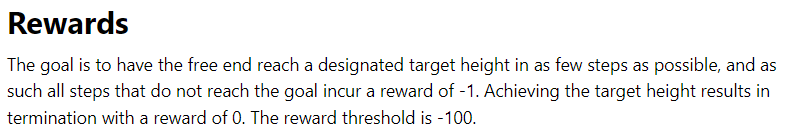

沒訓練的時候通常 reward = -500
最高reward是0
在碰到目標現之前reward會-1累計